In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline


In [7]:
bike_rentals = pd.read_csv('hour.csv')
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


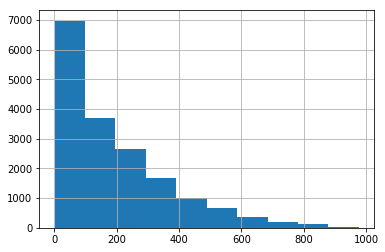

In [8]:
bike_rentals['cnt'].hist()


In [10]:
bike_rentals.corr()['cnt']


instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [11]:
def assign_label(hr):
    if (hr >= 6) & (hr < 12):
        label = 1
    if (hr >= 12) & (hr < 18):
        label = 2
    if (hr >= 18) & (hr < 24):
        label = 3
    if (hr >= 0) & (hr < 6):
        label = 4
    return label
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

In [12]:
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


In [13]:
train = bike_rentals.sample(frac = .8)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

predictors = list(train.columns)
predictors.remove("cnt")
predictors.remove("casual")
predictors.remove("registered")
predictors.remove("dteday")

reg = LinearRegression()

reg.fit(train[predictors], train["cnt"])
reg_pred = reg.predict(test[predictors])

reg_error = mean_squared_error(test['cnt'], reg_pred)

In [15]:
reg_error

17106.134401788182

In [19]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(min_samples_leaf = 5)
tree.fit(train[predictors], train["cnt"])
tree_pred = tree.predict(test[predictors])

tree_error = mean_squared_error(test['cnt'], tree_pred)

In [20]:
tree_error

2539.1579797751024

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(min_samples_leaf = 3)
rf.fit(train[predictors], train["cnt"])
rf_pred = rf.predict(test[predictors])

rf_error = mean_squared_error(test['cnt'], rf_pred)

In [30]:
rf_error

1851.591616135291